   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
Accuracy: 97.78%
Confusion Matrix:
[[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]


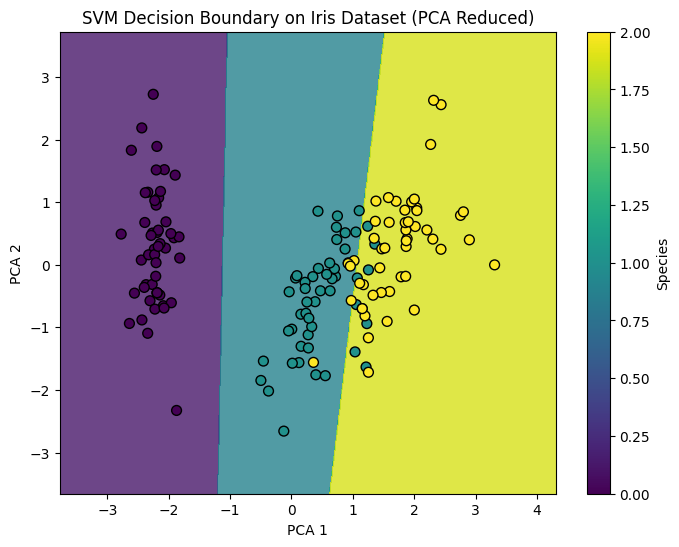

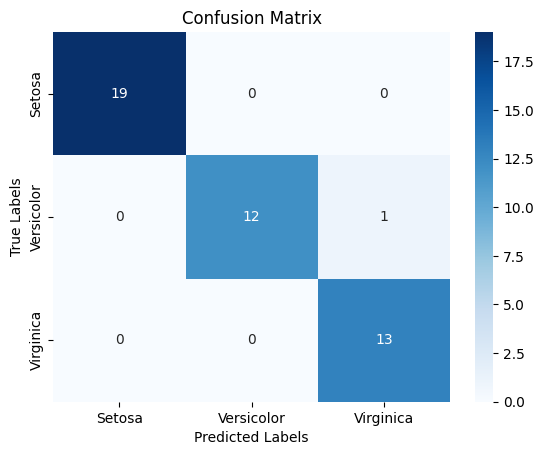

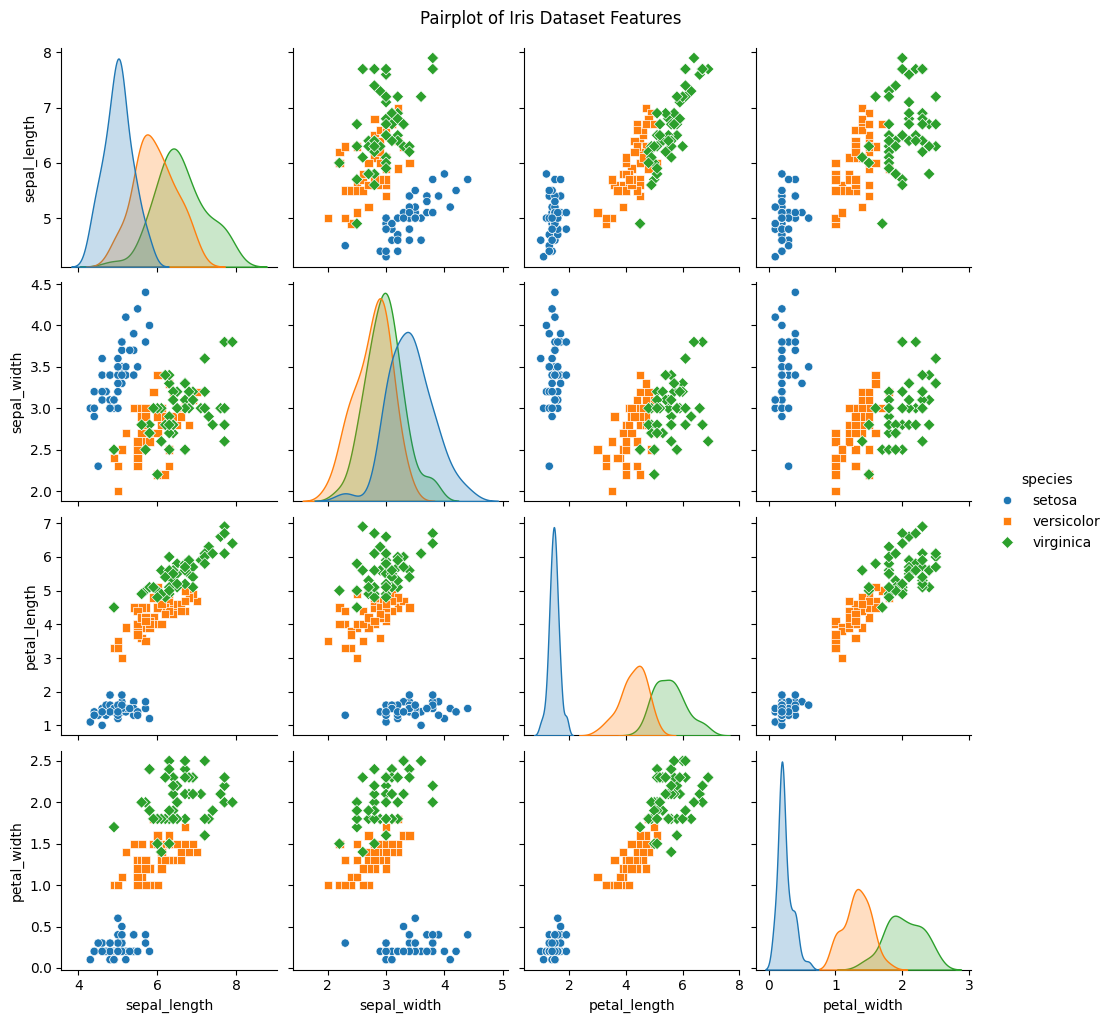

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
iris_data = pd.read_csv('iris.csv')
print(iris_data.head())
X = iris_data.drop('species', axis=1)  
y = iris_data['species'] 
y = y.map({'setosa': 0, 'versicolor': 1, 'virginica': 2})
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
svm_clf = SVC(kernel='linear', random_state=42)
svm_clf.fit(X_train, y_train)
y_pred = svm_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Confusion Matrix:\n{cm}")
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
svm_clf.fit(X_pca, y)
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = svm_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, edgecolors='k', marker='o', s=50)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('SVM Decision Boundary on Iris Dataset (PCA Reduced)')
plt.colorbar(label='Species')
plt.show()

# Optional: Detailed confusion matrix plot
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Setosa', 'Versicolor', 'Virginica'], 
            yticklabels=['Setosa', 'Versicolor', 'Virginica'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# NEW: Visualize the relationships between features with Pairplot
sns.pairplot(iris_data, hue='species', markers=["o", "s", "D"])
plt.suptitle('Pairplot of Iris Dataset Features', y=1.02)  # Adjust title position
plt.show()
